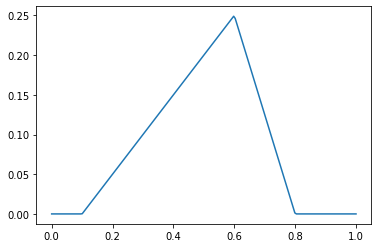

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(0, 1, 200)

#set up a function of x
y = x.copy()
y[x < 0.1] = 0
y[x >= 0.1] = 0.5*(x[x >= 0.1]-0.1)
y[x >= 0.6] = 0.25-0.25/0.2*(x[x >= 0.6]-0.6)
y[x > 0.8] = 0

fig, ax = plt.subplots()
plt.plot(x,y)


Epoch 1/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.3000
Epoch 2/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.3000
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.3000
Epoch 4/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.3000
Epoch 5/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.3000
Epoch 6/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.3000
Epoch 7/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.3000
Epoch 8/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.3000
Epoch 9/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.3000
Epoch 10/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.3000
Epoch 11/2000
7/7 [

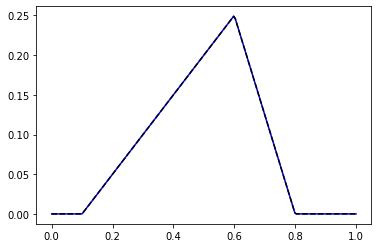

In [4]:
#now try fitting the function with a neural network
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import *

model = Sequential()

#single layered model
#model.add(Dense(units=3, activation='relu', input_dim=1)) 
model.add(Dense(units=150, activation='relu', input_dim=1)) 
#model.add(Dense(units=150, activation='sigmoid', input_dim=1)) 
#model.add(Dense(units=150, activation='tanh', input_dim=1)) 
#model.add(Dense(units=150, activation='softplus', input_dim=1)) 

#try a multi-layered model
#activation_function = 'relu'
#activation_function = 'tanh'
#model.add(Dense(units=10, activation=activation_function, input_dim=1)) 
#model.add(Dense(units=10, activation=activation_function)) 
#model.add(Dense(units=10, activation=activation_function)) 

model.add(Dense(units=1, activation='linear'))

model.compile(loss="mean_squared_error",
              optimizer='adam',
               metrics=['accuracy'])


#First attempt:
#model.fit(x, y, epochs=200, batch_size=32)

#Do this if setting manually:
#model.layers[0].set_weights([np.array([[0.5, -(-0.5-0.25/0.2), 0.25/0.2]],), np.array([-0.5*0.1, (-0.5-0.25/0.2)*0.6, -(0.25/0.2)*0.8],)])
#model.layers[1].set_weights([np.array([[1],[-1],[1]],), np.array([0],)])

#Second attempt, with more nodes in layer/multi-layer
model.fit(x, y, epochs=2000, batch_size=32)

y_pred = model.predict(x)


fig, ax = plt.subplots()
plt.plot(x,y,'b-')
plt.plot(x,y_pred,'k--')
